# Project Title: Predicting Startup Success

Claudia Maria Carboni - matricola 535421

1. Define the Problem

- Objective: Predict whether a startup will succeed or fail based on various features such as funding, industry, location, and other relevant attributes.

- Type of ML Task: Supervised classification problem (binary classification).

2. Dataset Description

- Source: The dataset is obtained from Kaggle [https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase].

- Features: The dataset includes various features such as:
name: Name of the startup
status: Current status (closed, operating)
funding_total_usd: Total funding received
funding_rounds: Number of funding rounds
first_funding_at: Date of first funding
last_funding_at: Date of last funding
category_code: Industry category
city, state_code, country_code: Location information

Additional features.

In [1]:
import sklearn
import pandas as pd
import numpy as np
import itertools
import imblearn
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from scipy.stats import loguniform, beta, uniform
import seaborn as sns
from joblib import dump, load

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.metrics import recall_score, precision_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_recall_curve

import missingno as msno
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 

import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/work/big_startup_dataset.csv')

In [3]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/sweigh,Sweigh,http://www.sweigh.com,Entertainment|Media|Social Media|Social Opinio...,1180000,operating,USA,NY,Long Island,Centerport,2,2013-10-01,2014-07-15,2015-08-15
1,/organization/saber-seven,Saber Seven,http://www.saberseven.com,Curated Web,4000000,closed,USA,NY,New York City,New York,1,NaN,2009-08-20,2009-08-20
2,/organization/coeurative,Coeurative,NaN,Biotechnology,120000,operating,USA,VA,Roanoke,Roanoke,1,2012-01-01,2013-05-20,2013-05-20
3,/organization/corporate360,Corporate360,http://www.corporate360.us/,B2B|Big Data|Enterprise Software|SaaS|Sales an...,200000,operating,SGP,NaN,Singapore,Singapore,1,2012-01-02,2015-01-22,2015-01-22
4,/organization/tomoguides,tomoguides,http://tomoguides.com,Blogging Platforms|Fashion|Utilities,-,closed,USA,WA,Seattle,Seattle,1,NaN,2012-08-01,2012-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,/organization/trendpo,TrendPo,http://trendpo.com,Analytics|Governments|Politics,200000,operating,USA,DC,"Washington, D.C.",Washington,1,2012-05-01,2013-06-17,2013-06-17
9996,/organization/twin-willows-construction,Twin Willows Construction,http://Www.twinwillowsconstruction.com,Real Estate,175000,operating,USA,TN,Knoxville,Knoxville,1,2012-04-01,2014-08-24,2014-08-24
9997,/organization/stratopy,Stratopy,http://www.stratopy.com,Android|Apps|iPhone|Mobile,45000,operating,USA,TX,Houston,Houston,1,2010-09-16,2010-09-16,2010-09-16
9998,/organization/sustainatopia-com,Sustainatopia.com,http://www.sustainatopia.com,News,40000,operating,USA,FL,Miami,Miami,1,2010-10-12,2013-02-13,2013-02-13


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          10000 non-null  object
 1   name               9999 non-null   object
 2   homepage_url       9100 non-null   object
 3   category_list      9210 non-null   object
 4   funding_total_usd  10000 non-null  object
 5   status             10000 non-null  object
 6   country_code       8422 non-null   object
 7   state_code         8157 non-null   object
 8   region             8258 non-null   object
 9   city               8258 non-null   object
 10  funding_rounds     10000 non-null  int64 
 11  founded_at         7386 non-null   object
 12  first_funding_at   9996 non-null   object
 13  last_funding_at    10000 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [6]:
# shows dtypes of each column

df.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

## Feature of the dataset

In [8]:
# Print the name of all the columns 
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

## Missing Data

We use missingno to visualize missing values in the dataset.

<Axes: >

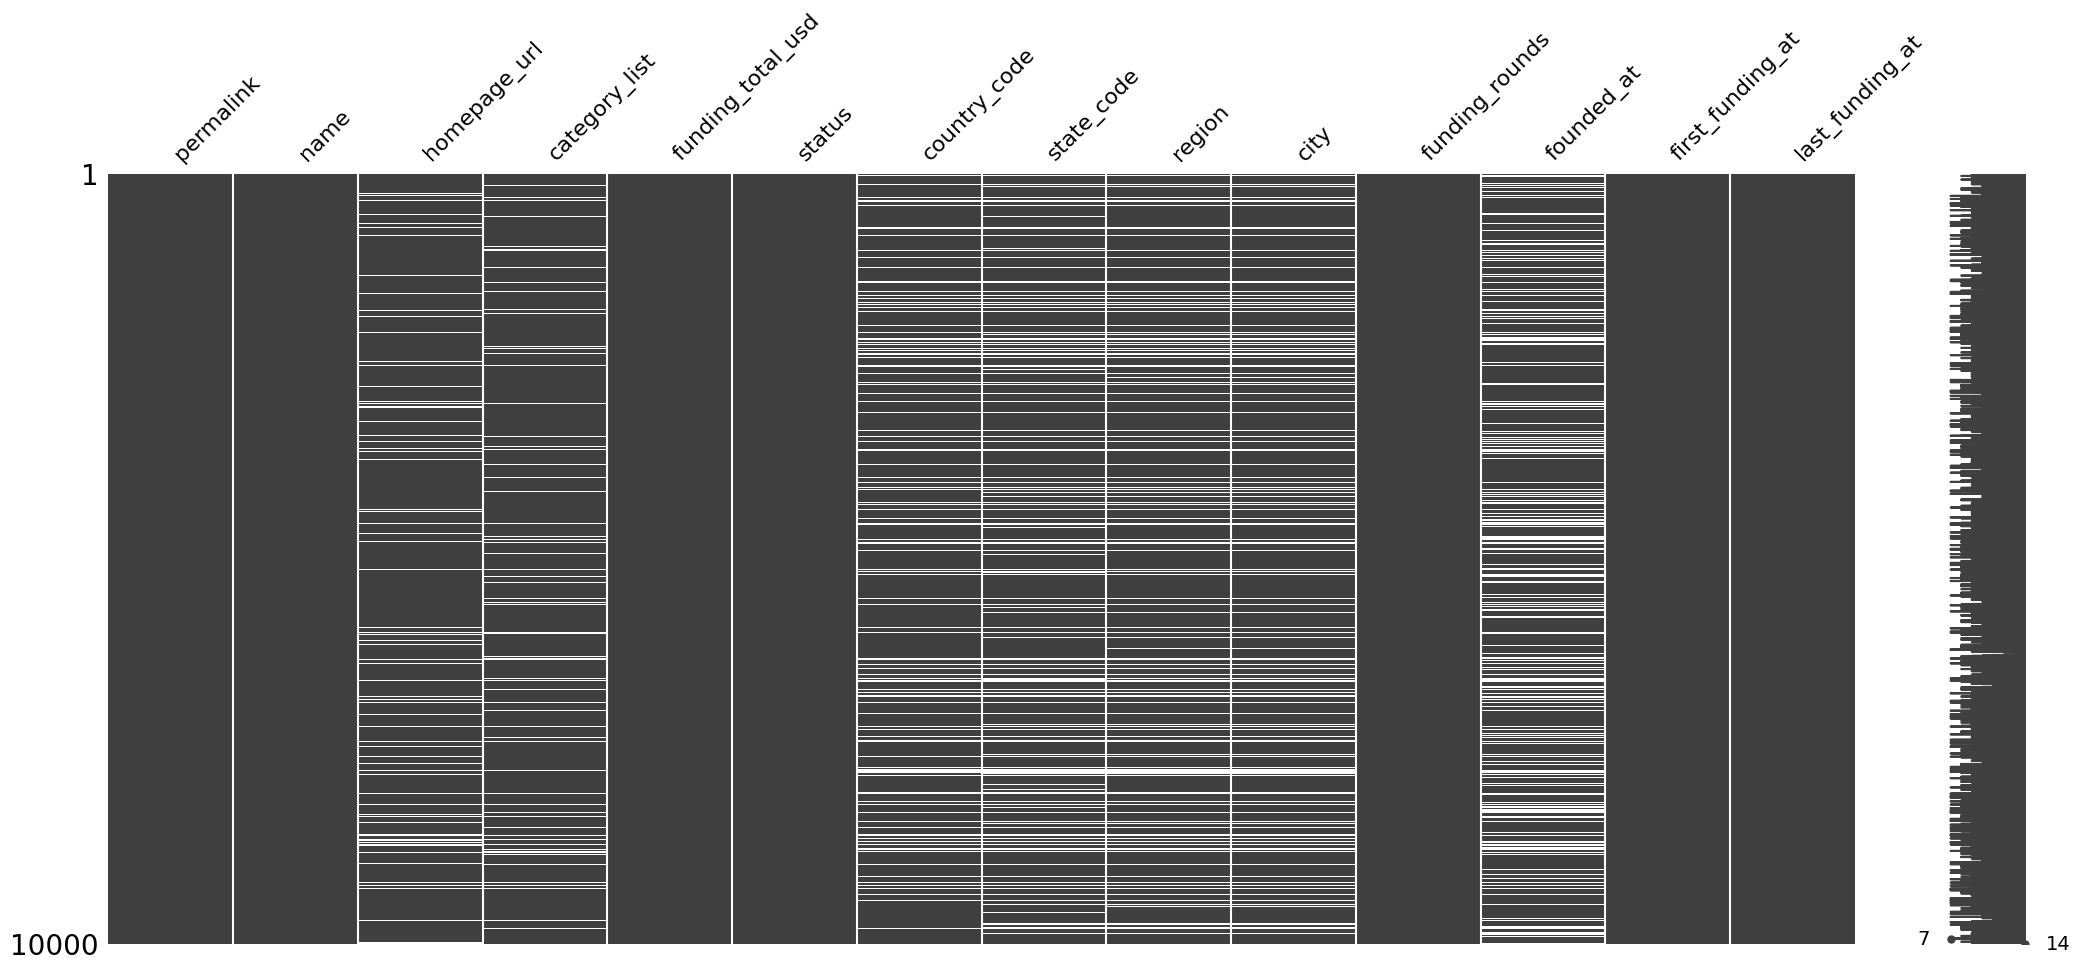

In [9]:
# Show graphycally the missing value
msno.matrix(df)

In [10]:
# Find The number of values the missing values for each column
df.isna().sum()

permalink               0
name                    1
homepage_url          900
category_list         790
funding_total_usd       0
status                  0
country_code         1578
state_code           1843
region               1742
city                 1742
funding_rounds          0
founded_at           2614
first_funding_at        4
last_funding_at         0
dtype: int64

In [11]:
# Find the percentage of missing values column by column
df.isnull().sum(axis=0)/df.shape[0]

permalink            0.0000
name                 0.0001
homepage_url         0.0900
category_list        0.0790
funding_total_usd    0.0000
status               0.0000
country_code         0.1578
state_code           0.1843
region               0.1742
city                 0.1742
funding_rounds       0.0000
founded_at           0.2614
first_funding_at     0.0004
last_funding_at      0.0000
dtype: float64

homepage_url, country_code, state_code, region, city, founded_at: These columns have a relatively high percentage of missing values. Depending on our analysis or model requirements, we might need to:

- Removing columns or row values contained missing data. 

- Imputing missing values, that means substituting the missing values with the mean of the column (mean imputer), the median (median imputer) and other similar imputation.

name, funding_total_usd, status, funding_rounds, first_funding_at, last_funding_at: These columns have few or no missing values, indicating good data completeness in key areas.

Finally, we have the column with the most missing data, when it was founded (26%). We could replace those values by extracting the years (which is what we are looking for).

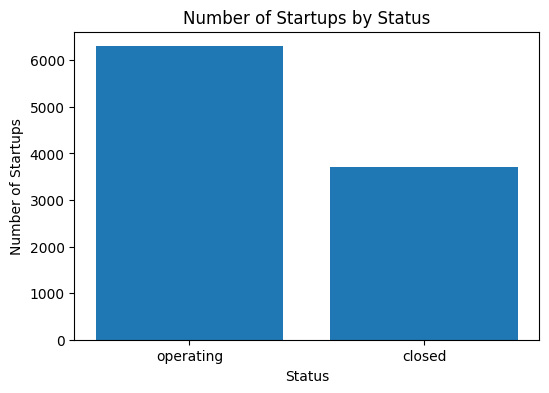

In [12]:
# Display the bar plot
status_counts = df['status'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(status_counts.index, status_counts.values)

plt.title('Number of Startups by Status')
plt.xlabel('Status')
plt.ylabel('Number of Startups')

plt.show()

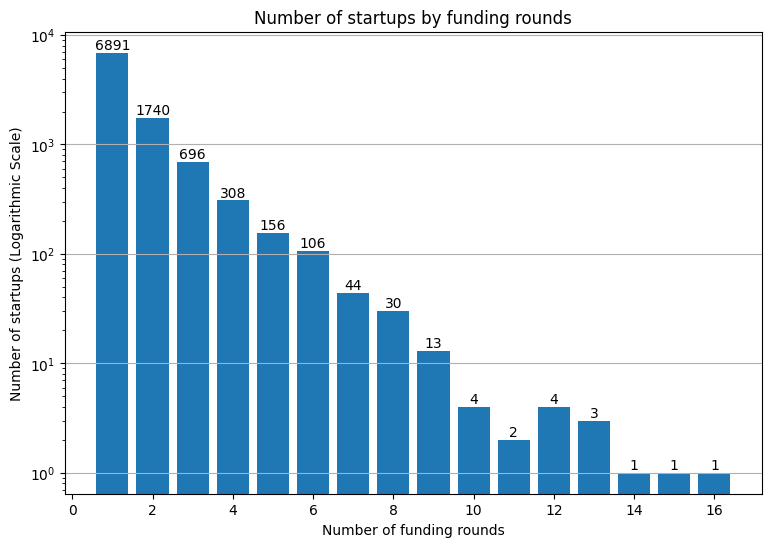

In [13]:
# Display the bar plot using the funding rounds column
plt.figure(figsize=(9, 6))

counts = df['funding_rounds'].value_counts()
x = counts.index
y = counts.values

plt.bar(x, y)

plt.title('Number of startups by funding rounds')
plt.ylabel('Number of startups (Logarithmic Scale)')
plt.xlabel('Number of funding rounds')

plt.grid(axis='y')
plt.yscale('log')

# Function to add labels on each bar
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(x[i], y[i] + 0.01 * y[i], f'{int(y[i])}', ha='center', va='bottom')

addlabels(x, y)
plt.show()

## Numerical Data

In [14]:
# Identification of Numerical Data

numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_data=[]
df_num=df.select_dtypes(include=numeric)
for x in df_num.head(1):
    print(f"{x} is a numerical value")
    numerical_data.append(x)
print(f'the numerical value are: ', len(numerical_data))

funding_rounds is a numerical value
the numerical value are:  1


## Categorical Data

In [15]:
df['category_list'].value_counts()

Software                                                                                                                       558
Biotechnology                                                                                                                  477
Curated Web                                                                                                                    196
E-Commerce                                                                                                                     176
Mobile                                                                                                                         171
                                                                                                                              ... 
Algorithms|Art|Content|Music|Reviews and Recommendations|Social Media|Social Network Media                                       1
Mobile|Networking|Retail                                                           

## The Status Label

In [16]:
# Add the new column with binary mapping
STATUS = []
for x in df['status']:
    if x == 'closed':
        STATUS.append(0)  # Failure (0)
    elif x == 'operating':
        STATUS.append(1)  # Success (1)

df["STATUS"] = STATUS

# Visualize the dataset with the new column
df.head()


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,STATUS
0,/organization/sweigh,Sweigh,http://www.sweigh.com,Entertainment|Media|Social Media|Social Opinio...,1180000,operating,USA,NY,Long Island,Centerport,2,2013-10-01,2014-07-15,2015-08-15,1
1,/organization/saber-seven,Saber Seven,http://www.saberseven.com,Curated Web,4000000,closed,USA,NY,New York City,New York,1,NaN,2009-08-20,2009-08-20,0
2,/organization/coeurative,Coeurative,NaN,Biotechnology,120000,operating,USA,VA,Roanoke,Roanoke,1,2012-01-01,2013-05-20,2013-05-20,1
3,/organization/corporate360,Corporate360,http://www.corporate360.us/,B2B|Big Data|Enterprise Software|SaaS|Sales an...,200000,operating,SGP,NaN,Singapore,Singapore,1,2012-01-02,2015-01-22,2015-01-22,1
4,/organization/tomoguides,tomoguides,http://tomoguides.com,Blogging Platforms|Fashion|Utilities,-,closed,USA,WA,Seattle,Seattle,1,NaN,2012-08-01,2012-08-01,0


## Data Preprocessing

In [17]:
# Find the percentual of null values in the column
for column in df.columns:
    percent_null = df[column].isna().mean() * 100
    print(f"Percentage of null values in {column}: {percent_null:.2f}%")

Percentage of null values in permalink: 0.00%
Percentage of null values in name: 0.01%
Percentage of null values in homepage_url: 9.00%
Percentage of null values in category_list: 7.90%
Percentage of null values in funding_total_usd: 0.00%
Percentage of null values in status: 0.00%
Percentage of null values in country_code: 15.78%
Percentage of null values in state_code: 18.43%
Percentage of null values in region: 17.42%
Percentage of null values in city: 17.42%
Percentage of null values in funding_rounds: 0.00%
Percentage of null values in founded_at: 26.14%
Percentage of null values in first_funding_at: 0.04%
Percentage of null values in last_funding_at: 0.00%
Percentage of null values in STATUS: 0.00%


## Handling non-numerical data

### Extract Year from Date Columns

We convert date columns to datetime and extract the year. In this way, we reduce data complexity and make analysis easier, thereby improving performance and generalization.

In [18]:
# Manually extract the year from a date string formatted as 'YYYY-MM-DD'
# Convert to datetime with errors='coerce' to handle invalid dates
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')


# Extract year from date columns
df['founded_year'] = df['founded_at'].dt.year
df['first_funding_year'] = df['first_funding_at'].dt.year
df['last_funding_year'] = df['last_funding_at'].dt.year

# Drop the original date columns
df = df.drop(columns=['founded_at', 'first_funding_at', 'last_funding_at'])

df[['founded_year', 'first_funding_year', 'last_funding_year']].head()

,founded_year,first_funding_year,last_funding_year
0,2013.0,2014.0,2015
1,NaN,2009.0,2009
2,2012.0,2013.0,2013
3,2012.0,2015.0,2015
4,NaN,2012.0,2012


### Data Cleaning

In [19]:
# Fill the missing values
df.country_code.fillna("NULL",inplace=True)
df.funding_total_usd.replace({"-":np.NaN},inplace=True)

# Replace dashes with NaN in 'funding_total_usd'
df['funding_total_usd'] = df['funding_total_usd'].replace('-', np.nan)

# Remove commas and convert the column to numeric, coercing errors to NaN
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])

df[['country_code', 'funding_total_usd']].head()

,country_code,funding_total_usd
0,USA,1180000.0
1,USA,4000000.0
2,USA,120000.0
3,SGP,200000.0
4,USA,NaN


In [20]:
print(df['funding_total_usd'].dtype)

float64


### Numerical Data

In [21]:
# Identification of Numerical Data

numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_data=[]
df_num=df.select_dtypes(include=numeric)
for x in df_num.head(1):
    print(f"{x} is a numerical value")
    numerical_data.append(x)
print(f'the numerical value are: ', len(numerical_data))

funding_total_usd is a numerical value
funding_rounds is a numerical value
STATUS is a numerical value
founded_year is a numerical value
first_funding_year is a numerical value
last_funding_year is a numerical value
the numerical value are:  6


### Categorical Data

In [22]:
# Identification of Categorical Data

categorical = ['object']
categorical_data = []
df_cat = df.select_dtypes(include=categorical)
for x in df_cat.head(1):
    print(f"{x} is a categorical value")
    categorical_data.append(x)
print(f'The categorical values are: ', len(categorical_data))

permalink is a categorical value
name is a categorical value
homepage_url is a categorical value
category_list is a categorical value
status is a categorical value
country_code is a categorical value
state_code is a categorical value
region is a categorical value
city is a categorical value
The categorical values are:  9


### TopNOneHotEncoder

Custom transformer to encode only the most frequent categories. Since I have categorical variables with many unique categories, I use TopNOneHotEncoder to encode only the most frequent categories and reduce dimensionality.

 This avoids the explosion of the feature space that can happen with traditional one-hot encoding on high-cardinality categorical features.

In [23]:
class TopNOneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, n=10): 
        
        self.n = n
        self.top_n = []
        
    def fit(self, X, y=None):

        # find the top n most frequent values in the current column
        for col in X.columns:
            top_n_values = list(X[col].value_counts().nlargest(self.n).index)
            self.top_n.append({col: top_n_values}) # store in the top_n list
        return self
    
    def transform(self, X):

        # do the one-hot encoding only for the first 5 n columns 
        X_new = pd.DataFrame()
        for i, col in enumerate(X.columns):
            top_n_values = self.top_n[i][col] # top N values for the current column
            for value in top_n_values:
                new_col = f"{col}_{value}"
                # one-hot encode: 1 if the value matches, otherwise 0
                X_new[new_col] = (X[col] == value).astype(int)
        return X_new

By ignoring rare categories, my model focuses on more general patterns. This reduces computation time and allows me to concentrate on what matters most. It limits computational costs (avoiding resource waste) and reduces the risk of overfitting.

## Pipeline

Pipelines for numerical, categorical, and date columns are defined and combined into a ColumnTransformer.

In [24]:
# Imputation and transformation for numerical columns
pipeline_numerical = Pipeline([
    ('imp', SimpleImputer(strategy='median', add_indicator=True)), 
    ('scaler', StandardScaler())
]) 

# Imputation and transformation for categorical columns
pipeline_categorical = Pipeline([
    ('topn', TopNOneHotEncoder(n=5))  # Top N encoding with the 5 most frequent categories
])

# Imputation and transformation for date columns (using KNN imputation)
pipeline_dates = Pipeline([
    ('imp', KNNImputer()),
    ('scaler', StandardScaler())
]) 

In [25]:
# Combine all pipelines into a ColumnTransformer
final_transformation = ColumnTransformer(transformers=[
    ('num', pipeline_numerical, ['funding_total_usd', 'funding_rounds']),
    ('cat', pipeline_categorical, ['country_code', 'state_code', 'city', 'category_list']),
    ('dates', pipeline_dates, ['founded_year', 'first_funding_year', 'last_funding_year'])
],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)

# Apply the transformation
pass_through_transformer = final_transformation.fit_transform(df)

# Print the shape of the transformed data
print(f"Transformed data shape: {pass_through_transformer.shape}")

Transformed data shape: (10000, 26)


## Training and test sets

Now we can split the entire dataset in train and test. We will use a test_size of 0.3. 

This process is made when we have a supervised task: the label class is given, and we have to predict the future instances

In [26]:
# Define X and y
X = df.drop('STATUS', axis=1)  
y = df['STATUS']  

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, shuffle = True)
print('Shape of X_train: {}\nShape of X_test: {}'.format(X_train.shape, X_test.shape))

Shape of X_train: (7000, 14)
Shape of X_test: (3000, 14)


## Model Selection

### Handling unbalanced class

Calculate the distribution of classes and create a pie chart to visualize it.

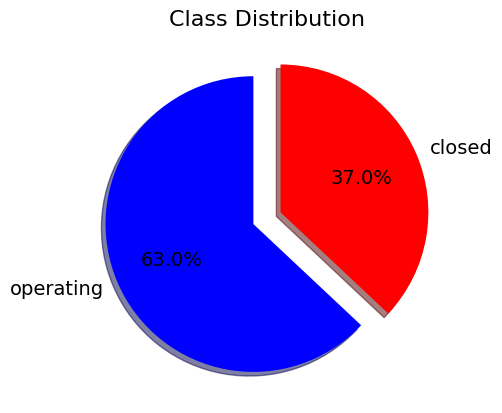

In [28]:
# Calculate the distribution of classes
class_distribution = df["status"].value_counts()

# Prepare the 'explode' parameter to emphasize all classes slightly
explode = [0.1] * len(class_distribution)  # Creates an array of 0.1s for each class

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90,
       explode=explode, shadow=True, textprops={'fontsize': 14},
       colors=['blue', 'red'])  # Adjust colors as needed

# Add a title to the chart
ax.set_title("Class Distribution", fontsize=16)

# Show the chart
plt.show()

From the pie chart, we can observe the issue of imbalanced classes. The majority class is 'operating,' representing 63%, while the minority class is 'closed,' with 37%. Therefore, we need to pay attention to this and we can then apply two main techniques to address the problem:

- Handling imbalanced classes through resampling.

- Handling imbalanced classes through cost-sensitive learning.

These techniques can be implemented using the Pipeline class from the imbalanced-learn library, which allows us to create a combined sequence of methods to apply to the dataset.

### IMBPipeline

We define a pipeline to handle class imbalance, dimensionality reduction, and classification.

In [29]:
model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', SMOTE()),
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

In [30]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['funding_total_usd',
                                                   'funding_rounds']),
                                                 ('cat',
                                                  Pipeline(steps=[('topn',
                                                                   TopNOneHotEncoder(n=5))]),
                                                  ['country_code', 'state_code',
                                                   'city', 'category_list']),
                                                 ('dates',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['founded_year',
                                                   'first_funding_year',
                                                   'last_funding_year'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

In [31]:
model_pipeline.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0])

In [32]:
f1_score(y_train, model_pipeline.predict(X_train))

0.720592839995825

### Samplers

A sampler is a preprocessing step, that is used to address class imbalance in the training data.

A sampler in fact is used to resample the data in order to balance the class distribution, so to increase the performances.

There are two main types of sampling techniques used in machine learning:

- under-sampling: reduce the number of samples in the majority class, by selecting randomly a subset of samples, to match the number of samples in the minority class.

- over-sampling: increase the number of samples in the minority class, to match the number of samples in the majority class.

There are different types of samplers in scikit-learn and other machine learning libraries, including:

- SMOTE (Synthetic Minority Over-sampling Technique): technique for over-sampling the minority class in imbalanced datasets. It generates synthetic samples for the minority class from existing k samples.

- RandomUnderSampler: technique for under-sampling the majority class in imbalanced datasets. It randomly selects a subset of samples from the majority class and get rid off them to match the number of samples in the minority class.

- RandomOverSampler: technique for over-sampling the minority class in imbalanced datasets. It randomly duplicates samples in the minority class, until the number of samples in both classes is equal.

- TomekLinks: technique for under-sampling the majority class in imbalanced datasets. Identify pairs of samples from different classes, closest to each other in the feature space. Then the majority class samples in each pair are then removed.

We start by defining the list of all this sampler, with different configurations, that will be compared in nested cross validation.

In [33]:
# Define a list of different sampler configurations to test

sampler_configurations = [
    # no sampling strategy
    {
        'sampler': [None]
    },
    # use SMOTE with different percentages of synthetic samples to generate
    {
        'sampler': [SMOTE(n_jobs=-1, random_state=33)], 
        'sampler__sampling_strategy': ['minority', 0.9, 0.8, 0.7] 
    },
    # use RandomOverSampler with different percentages of synthetic samples to generate
    {
        'sampler': [RandomOverSampler()],  # Random oversampling
        'sampler__sampling_strategy': ['minority', 0.9, 0.8, 0.7]
    },
    # use TomekLinks for undersampling
    {
        'sampler': [TomekLinks()],
        'sampler__n_jobs': [-1]
    }
]

### Dimensionality reduction

A dimensionality reduction technique is a preprocessing step used to reduce the number of features

Dimensionality reduction is a technique used to remove the features in a dataset, especially an high-dimensional one, that are less informative. This is done because we improve the performance and the interpretability, reducing overfitting and the computational complexity. But it can also lead to loss of important information, decreasing the accuracy of the model.

There are two main types of dimensionality reduction:

- feature selection: select a subset of features to use, based on some criteria

- feature extraction: create new features that are a combination of the most important information in the original ones.

There are different types of dimensionality reduction techniques, such as:

- PCA (Principal Component Analysis): technique for feature extraction. The algorithm selects a smaller number of features than the original dataset, a linear combination of features, to get the maximum amount of variance in the data and then projecting the data onto these new features. We obtain principal components, used as input features for the model. PCA is very useful with high-dimensional data, as it reduce the number of features without significantly loose information.

- LDA (Linear Discriminant Analysis): technique for feature extraction. The algorithm find the linear combinations of features that best separate the classes in the data, so which maximizes the between-class variance and minimizes the within-class variance. The resulting projections are used as input features. LDA is very useful when we want to separate the classes in the data, that are well-defined.

- SFS (Sequential Feature Selection): technique for feature selection. Starting with a subset of original features, the algorithm evaluates the model performance with each feature added or removed. The feature subset that yields the best performance is then selected. Repeat the process until we get a desired number of features. SFS is very useful when we want to identify a small subset of relevant features.

We define, as in samples, a list of all this dimensionality reduction techniques, with different configurations.

In [34]:
dim_reduction_configurations = [
    {
        'dim_reduction': [None]  # no dimensionality reduction
    },
    {
        'dim_reduction': [PCA(random_state=33)],  # PCA with random seed
        'dim_reduction__n_components': [0.5, 0.7, 0.9]  # percentages of variance explained by principal components
    },
    {
        'dim_reduction': [LDA()],  # we don't specify the number of componens since LDA determine them automatically
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron())],  # Sequential Feature Selection with Perceptron estimator
        'dim_reduction__estimator': [  # estimator options for SFS
            Perceptron(eta0=0.1, class_weight='balanced', n_jobs=-1, random_state=33),  # perceptron with specific hyperparameters
            LogisticRegression(C=1, solver='liblinear', class_weight='balanced', n_jobs=-1)  # logistic regression with specific hyperparameters
        ],
        'dim_reduction__scoring': ['f1'],  # target score for SFS
        'dim_reduction__k_features': [2, 5],  # number of features that the algorithm should select
        'dim_reduction__n_jobs': [-1]  # number of CPU cores we want to use for parallel processing
    }
]

### Classifiers

A classifier is a preprocessing step used to classify the data.

A classifier is a model that takes as input the data and predicts a target variable, so it's able to make predictions or decisions about new, unseen data based on patterns learned from training data.

In binary classification, the output is interpreted as a probability that a given instance belongs to one of the two classes.

There are many different types of classifiers, and  in this project we will use:

- Perceptron: linear algorithm used for classification, which classifies the data by finding an hyperplane that separates the data points.

- Logistic Regression: linear algorithm used for classification, which finds a decision boundary, by modelling the probabilities of the data points belonging to each class.

- KNN (K-Nearest Neighbors): non-parametric algorithm, which finds the K-nearest neighbors of a data point and then assigns a class based on the majority of the class labels of the neighbors.

- Random Forest: ensemble algorithm that combines the predictions of multiple decision trees to form a stronger model. The final classification is decided on the majority vote of the decision trees.

- Decision Tree: non-parametric algorithm that partitions the feature space recursively into smaller regions based on the input features, creating decision regions with the same label.

In [35]:
# Define classifier configurations after importing the required library
classifier_configurations = [
    {
        'classifier': [Perceptron(eta0= 0.01, class_weight = 'balanced')] # with specific hyperparameters
    },
    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C': loguniform(0.001, 10),  # regularization strength
        'classifier__penalty': ['l1', 'l2'],  # regularization types
        'classifier__class_weight': [None, 'balanced']
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7],  # number of neighbors
        'classifier__weights': ['uniform', 'distance']  # weighting of neighbors
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],  # number of trees
        'classifier__max_depth': [4, 8, 12],  # tree depth
        'classifier__class_weight': [None, 'balanced']
    },
    {
        'classifier' : [DecisionTreeClassifier(random_state=33)] ,
        'classifier__criterion' : ['entropy'] , # function to measure the quality of a split
        'classifier__max_depth' : [None, 5, 10, 15] # maximum depth of the tree
    }
]

### Nested-Cross Validation

We start by defining all the possible configurations of samplers, dimensionality reduction techniques, and classifiers in a list called all_configurations.

In [36]:
all_configurations = []
for configuration in itertools.product(dim_reduction_configurations, classifier_configurations, sampler_configurations):
    all_configurations.append((dict(itertools.chain(*(e.items() for e in configuration)))))

print(f'Number of all possible configurations: {len(all_configurations)}')

Number of all possible configurations: 80


We print the number of all the possible configurations of the IMBpipeline.

In [37]:
all_configurations[:10]

[{'dim_reduction': [None],
  'classifier': [Perceptron(class_weight='balanced', eta0=0.01)],
  'sampler': [None]},
 {'dim_reduction': [None],
  'classifier': [Perceptron(class_weight='balanced', eta0=0.01)],
  'sampler': [SMOTE(n_jobs=-1, random_state=33)],
  'sampler__sampling_strategy': ['minority', 0.9, 0.8, 0.7]},
 {'dim_reduction': [None],
  'classifier': [Perceptron(class_weight='balanced', eta0=0.01)],
  'sampler': [RandomOverSampler()],
  'sampler__sampling_strategy': ['minority', 0.9, 0.8, 0.7]},
 {'dim_reduction': [None],
  'classifier': [Perceptron(class_weight='balanced', eta0=0.01)],
  'sampler': [TomekLinks()],
  'sampler__n_jobs': [-1]},
 {'dim_reduction': [None],
  'classifier': [LogisticRegression(solver='saga')],
  'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fec6fdc9610>,
  'classifier__penalty': ['l1', 'l2'],
  'classifier__class_weight': [None, 'balanced'],
  'sampler': [None]},
 {'dim_reduction': [None],
  'classifier': [LogisticR

We define the inner loop, for the hyperparamter optimizations, using RandomizedSearchCV. 

In [38]:
rs = RandomizedSearchCV(
    estimator= model_pipeline,
    param_distributions=all_configurations,
    n_iter=len(all_configurations),
    n_jobs=-1, # the number of CPU cores we want to use for parallel processing
    cv=5,
    scoring='f1'
)

We define the outer loop, to find the best model with the best set of hyperparameters, using cross_validate method to evaluate the performance of the model.

In [39]:
scores = cross_validate(
    rs , # the estimators we found
    X = X_train , # train set
    y = y_train , # target train set
    cv = 10, # cross validation number or method
    scoring = 'f1' , # target score
    return_estimator = True , # to get the best estimators
    error_score = 'raise' , # to display errors
    verbose = 3 # to display the output
)

[CV] END ......................................., score=0.792 total time=12.9min
[CV] END ......................................., score=0.811 total time=15.7min
[CV] END ......................................., score=0.808 total time=14.5min
[CV] END ......................................., score=0.791 total time=13.9min
[CV] END ......................................., score=0.797 total time=13.5min
[CV] END ......................................., score=0.818 total time=13.0min
[CV] END ......................................., score=0.808 total time=11.6min
[CV] END ......................................., score=0.792 total time=12.0min
[CV] END ......................................., score=0.816 total time=12.5min
[CV] END ......................................., score=0.799 total time=11.4min


We can now display all the different estimators with the most 10 best configurations and their score on the train and test set, according to F1 score. The delta between these 2 values, in order to verify the estimator with less overfitting or underfitting.

In [40]:
print('Best 10 Estimators: Sampler, dimensionality reduction and performance (F1-score)')
best_configurations = []
for i, estimator in enumerate(scores['estimator']):
    pred_train = estimator.best_estimator_.fit(X_train, y_train).predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    difference = abs(f1_train - f1_test)
    
    config = all_configurations[i]  # current configuration
    best_configurations.append((config, f1_train, f1_test, difference))

# print the best configurations  
# based on the difference between the F1 score on the training set and the F1 score on the test set
best_configurations_sorted = sorted(best_configurations, key=lambda x: x[2], reverse=True)
for config, f1_train, f1_test, diff in best_configurations_sorted[:10]:
    print(f'Configuration: {config}')
    print(f'F1 on training set: {f1_train}, F1 on test set: {f1_test}')
    print(f'Difference between test and train: {diff}')
    print('-' * 40)

Best 10 Estimators: Sampler, dimensionality reduction and performance (F1-score)
Configuration: {'dim_reduction': [None], 'classifier': [LogisticRegression(solver='saga')], 'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fec6fdc9610>, 'classifier__penalty': ['l1', 'l2'], 'classifier__class_weight': [None, 'balanced'], 'sampler': [SMOTE(n_jobs=-1, random_state=33)], 'sampler__sampling_strategy': ['minority', 0.9, 0.8, 0.7]}
F1 on training set: 0.9204406364749081, F1 on test set: 0.808230018464785
Difference between test and train: 0.11221061801012311
----------------------------------------
Configuration: {'dim_reduction': [None], 'classifier': [KNeighborsClassifier()], 'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance'], 'sampler': [SMOTE(n_jobs=-1, random_state=33)], 'sampler__sampling_strategy': ['minority', 0.9, 0.8, 0.7]}
F1 on training set: 0.8682443588332416, F1 on test set: 0.8068093887026051
Difference betwe

The estimator with the smallest difference between the F1 score on the training set and the F1 score on the test set can be considered the best estimator, becuase it lead to less overfitting or underfitting of the data and is able to generalize well to new, unseen data.

In this case, the best delta is 0.012808984085421748, obtained with SMOTE and LogisticRegression (solver='saga', penalty='l1'). No dimensionality reduction technique is used, as we have relatively few features, and all of them are relevant for the prediction. Reducing them would result in a loss of accuracy. 

## Refinement of the selected model

### IMBPipeline

Define the IMBPipeline with the steps set according to the best estimator found before.

We define the four different steps of the IMBPipeline as:

- transf: the initial ColumnTransformer

- sampler: the SMOTE obtained in the best configuration

- dim_reduction: None, since the best estimator shows that a dimensionality reduction technique is not necessary

- classifier: the LogisticRegression (solver='saga', penalty='l1') obtained from the best result.

In [41]:
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', SMOTE(n_jobs=-1, random_state=33)),
    ('dim_reduction', 'passthrough'), 
    ('classifier', LogisticRegression(solver='saga', penalty='l1'))
])

These values are setted considering the values obtained before for Logistic Regression, when we get it as the best estimator.

In [42]:
# regularization strength (C)
parameters = {
    'classifier__C': loguniform(0.001, 10) 
}

To search and obtain the best hyperparameters for the classifier, we have to run as before the RandomizedSearchCV.

In [43]:
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = parameters,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1),
    n_iter=20,
    scoring='f1'
)

In [44]:
rs_best.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imp',
                                                                                                SimpleImputer(add_indicator=True,
                                                                                                              strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['funding_total_usd',
                                                                                'funding_rounds']),
                                                                              ('cat',
                                                                               Pipeline(steps=[...
                                                                                'first_funding_year',
                                                                                'last_funding_year'])],
                                                                verbose_feature_names_out=False)),
                                             ('sampler',
                                              SMOTE(n_jobs=-1,
                                                    random_state=33)),
                                             ('dim_reduction', 'passthrough'),
                                             ('classifier',
                                              LogisticRegression(penalty='l1',
                                                                 solver='saga'))]),
                   n_iter=20,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fec694e3340>},
                   scoring='f1')

In [45]:
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['funding_total_usd',
                                                   'funding_rounds']),
                                                 ('cat',
                                                  Pipeline(steps=[('topn',
                                                                   TopNOneHotEncoder(n=5))]),
                                                  ['country_code', 'state_code',
                                                   'city', 'category_list']),
                                                 ('dates',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['founded_year',
                                                   'first_funding_year',
                                                   'last_funding_year'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE(n_jobs=-1, random_state=33)),
                ('dim_reduction', 'passthrough'),
                ('classifier',
                 LogisticRegression(C=0.038756921908732145, penalty='l1',
                                    solver='saga'))])

In [46]:
f1_score(y_test, rs_best.best_estimator_.predict(X_test))

0.765733296368173

In [47]:
cls = rs_best.best_estimator_

### Performances

Performances with different metrics

We want to get the different performances with this estimator on our dataset. We use as metrics:

- f1: harmonic mean and balance of precision and recall. It's a useful metric when the classes are imbalanced

- recall: measures the percentage of actual positive cases, correctly identified by the model.

- accuracy: measures the proportion of true positive and true negative predictions to the total number of predictions made. However, it can be misleading in imbalanced datasets.

- precision: measures the proportion of true positives predictions to the total number of predicted positives.

F1-score = 2 * (precision * recall) / (precision + recall)

In [48]:
f1 = f1_score(y_test, rs_best.best_estimator_.predict(X_test))
f1

0.765733296368173

In [49]:
performances = {
    'recall' : recall_score, #Recall score 
    'accuracy' : accuracy_score, #Accuracy score
    'precision' : precision_score, #Precision score
    'f1' : f1_score, #f1 score
    'MCC' : matthews_corrcoef,  #MCC score
}

data_sets = {'train' : (X_train, y_train),'test' : (X_test, y_test)}

evaluation = {k:[]for k in performances.keys()}
evaluation['data_set'] = []

recall = TP / (TP + FN)

In [50]:
recall = recall_score(y_test, rs_best.best_estimator_.predict(X_test))
recall

0.7306878306878307

accuracy = (TP + TN) / (TP + TN + FP + FN)

In [51]:
accuracy = accuracy_score(y_test, rs_best.best_estimator_.predict(X_test))
accuracy

0.7183333333333334

precision = TP / (TP + FP)

In [52]:
precision = precision_score(y_test, rs_best.best_estimator_.predict(X_test))
precision

0.8043098427489808

We plot the different scores getted from the different performance metrics.

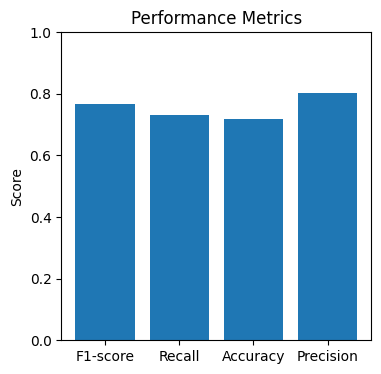

In [53]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.bar(['F1-score', 'Recall', 'Accuracy', 'Precision'], [f1, recall, accuracy, precision])
ax.set_ylim([0, 1])
ax.set_title('Performance Metrics')
ax.set_ylabel('Score')
plt.show()

We now store the best estimator inside the variable cls. This estimator is the one that achieved the best scores in the cv process, using the best_estimator_ attribute of RandomizedSearchCV

In [54]:
cls = rs_best.best_estimator_

## Model Evaluation

Model evaluation is essential for understanding a machine learning model’s predictive capabilities and identifying potential issues such as overfitting or underfitting. In this project, we used various evaluation tools, including the confusion matrix, ROC curve, validation curves, and learning curves, to assess the model’s performance comprehensively.

## Learning curves

The learning curve shows the model's performance as a function of the training set size. If the performance on the training data is much better than on the test data, there might be overfitting.

We plot learning curves to evaluate overfitting and underfitting.

In [55]:
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.6, 1.0)

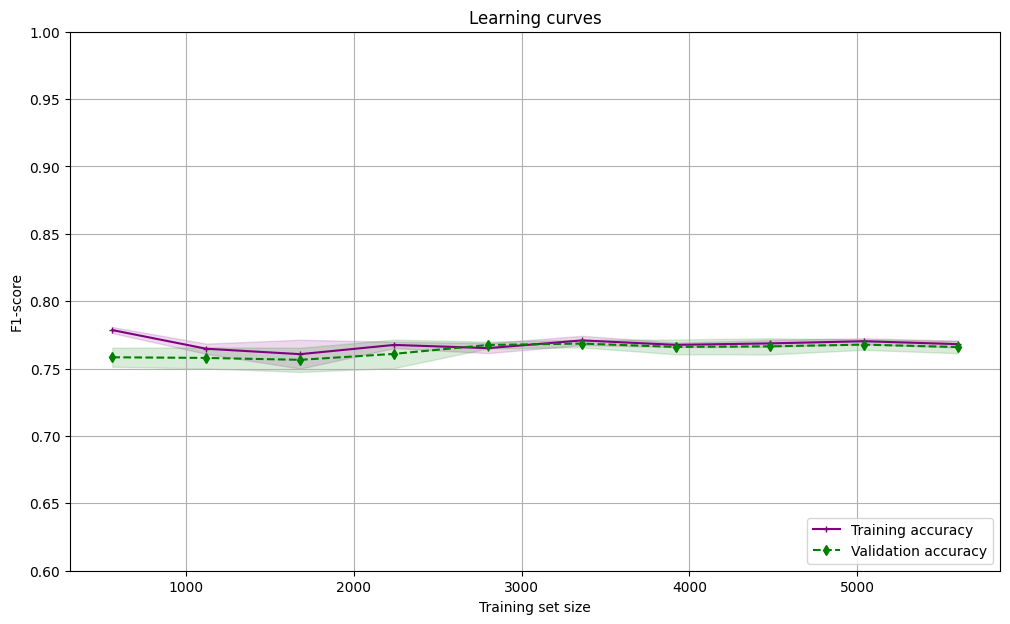

In [56]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='purple', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='purple')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_title('Learning curves')

ax.set_ylim([0.6, 1.0])

From the curve we can notice:

- a convergence between training and validation scores: this indicates that the model generalizes well without significant overfitting.

- a stable validation score: this suggests that we have enough data to reach reliable generalization.

## Validation curve

The validation curve shows the model's performance as a function of a hyperparameter (C for Logistic Regression). It is useful for identifying the optimal value of the hyperparameter.

We have 2 different lines:

- one for the training score (purple): shows the performance of the model with training data.

- one for the validation score (green): shows the performance of the model with validation data.

We plot validation curves to optimize hyperparameters.

In [57]:
# we will use 'classifier__C' as the parameter name for LogisticRegression.

# Define the range of 'C' values to test
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Perform validation_curve
train_scores, test_scores = validation_curve(
    estimator=cls,  # The LogisticRegression model
    X=X_train,
    y=y_train,
    param_name='classifier__C',  # hyperparameter 'C'
    param_range=C_range,  # Range of 'C' values
    cv=10,  
    n_jobs=-1,  
    scoring='f1'  # Evaluation metric
)

# Calculate mean and standard deviation for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

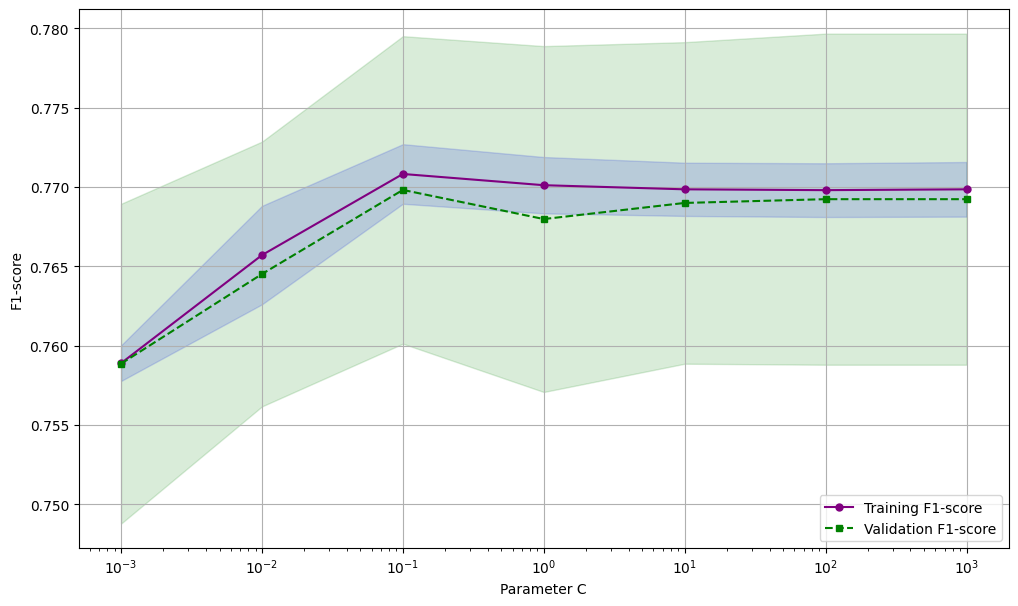

In [58]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(C_range, train_mean,
         color='purple', marker='o',
         markersize=5, label='Training F1-score')

ax.fill_between(C_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(C_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation F1-score')

ax.fill_between(C_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter C')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_xscale('log')

Now we observe how the model behaves as we vary this hyperparameter and we can understand that:

- overall the training and validation scores show a good balance,

- for the values of C, we notice slight overfitting, where the validation score begins to drop while the training score remains high.

## Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a model, by comparing the actual and predicted classes for a set of data.

For binary classification problems, the confusion matrix has two rows and two columns:

- The rows correspond to the actual class labels.

- The columns correspond to the predicted class labels.

We generate and plot the confusion matrix.

[[TN FP]
 [FN TP]]

Confusion Matrix: 
[[774 336]
 [509 1381]]


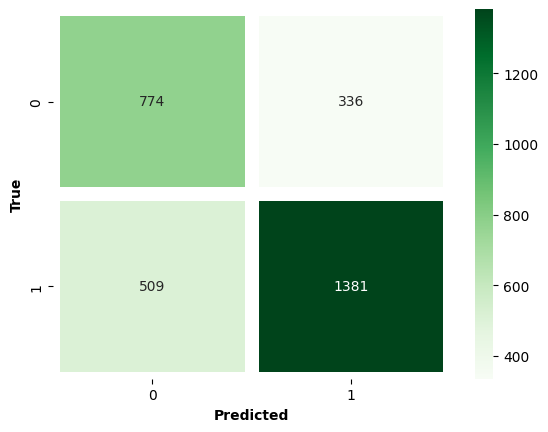

In [59]:
# Use the best estimator found with the second hyperparameter tuning
cls = rs_best.best_estimator_

# Predict labels on the test set
y_pred = cls.predict(X_test)

# Generate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print the confusion matrix
print(f"Confusion Matrix: \n[[{tn} {fp}]\n [{fn} {tp}]]")

# Plot the confusion matrix using seaborn
sns.heatmap([[tn, fp], [fn, tp]], linewidths=10, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.show()

The four cells in the matrix represent:

- True Positives (1381): Positive samples correctly classified.

- True Negatives (774): Negative samples correctly classified.

- False Positives (336): Negative samples incorrectly classified as positive.

- False Negatives (509): Positive samples incorrectly classified as negative.

This confusion matrix shows that our model performs well in classification. However, there is a moderate number of false negatives, which could be significant in scenarios where missing a positive prediction has a high cost.

### ROC curve

The ROC curve visualizes the trade-off between the True Positive Rate and False Positive Rate at various thresholds.

The ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are useful for evaluating the model's ability to distinguish between positive and negative classes. An AUC close to 1 indicates a good model.We plot the ROC curve and calculate the AUC score.

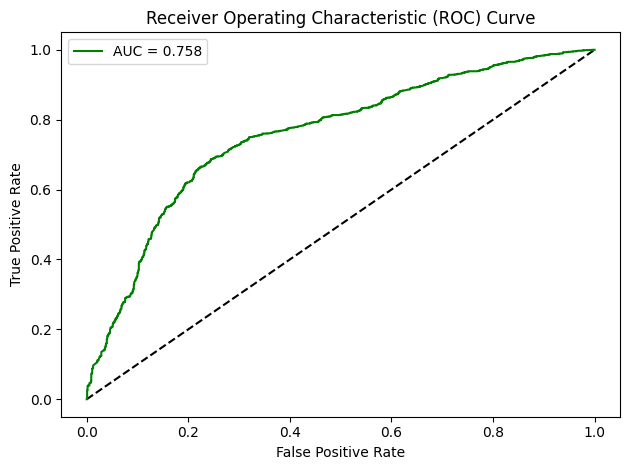

In [60]:
if 'rs_best' not in locals():
    # Use previously defined logic to set `rs_best`
    rs_best = RandomizedSearchCV(
        estimator = best_model_pipeline,
        param_distributions = parameters,
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1),
        n_iter=20,
        scoring='f1'
    )
    rs_best.fit(X_train, y_train)

# Proceed with plotting the ROC Curve
cls = rs_best.best_estimator_

# Predict probabilities on the test set
y_pred_prob = cls.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_prob)

# We define the false positive rate, the true positive rate and the tresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# ROC Curve Visualization
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='green', label='AUC = {:.3f}'.format(auc))

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()

- AUC = 0.758: This indicates a good discriminative capability of our model. An AUC value significantly above 0.5 confirms that the model performs better than random guessing,

- the curve stays close to the top-left corner, indicating a balanced model with good predictive performance.

## Conclusion

In this project, we developed a machine learning model to predict the success of startups using a Crunchbase dataset. After performing a thorough data preprocessing phase, including handling missing values and encoding categories. 

In particular:

- to handle missing values, we used techniques such as median imputation and random sample imputation.

- to encode categories, we implemented the TopNOneHotEncoder, which encodes only the most frequent categories, reducing dimensionality and improving model efficiency.

Afterwards, we implemented various techniques for class balancing (SMOTE, RandomOverSampler, TomekLinks) and dimensionality reduction (PCA, LDA, SFS). Using a well-structured pipeline and nested cross-validation, we optimized hyperparameters and selected the best model.

We tested several classifiers, including Perceptron, Logistic Regression, KNN, Random Forest, Decision Tree. The best-performing model was Logistic Regression.

To evaluate the model's performance, we used various evaluation techniques, including the learning curve, ROC curve, and confusion matrix. The main deductions are as follows:

- Learning Curve: The model does not suffer from overfitting and generalizes well on test data.

- ROC Curve: The model has a good ability to distinguish between positive and negative classes.

- Confusion Matrix: The model has good predictive capabilities and effectively balances precision and recall.

Performance metrics, including F1 score, recall, accuracy, and precision, indicate that the model has good predictive capabilities and effectively balances precision and recall. Visualizations of the learning curves and ROC curves confirm that the model does not suffer from overfitting and generalizes well on test data.

In summary, the developed model is robust and can be used to successfully predict the future of startups, providing a useful decision support tool for investors and entrepreneurs.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cb34235f-872b-4701-bb38-af02af0a7bfd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>